Import relevant libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Load MNIST Dataset

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

nsamples, nx, ny = x_train.shape
x_train_2D = x_train.reshape((nsamples,nx*ny))

standardize the features

In [12]:
#standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train_2D)

determine and plot covariance matrix

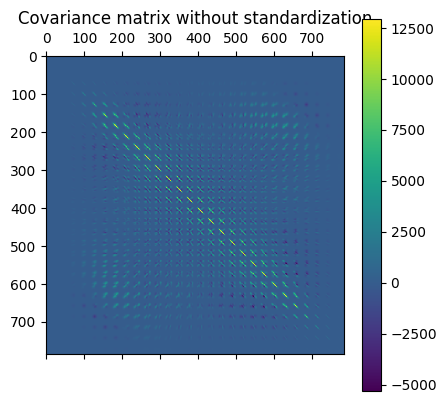

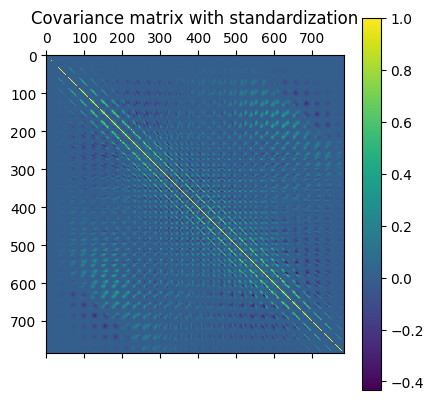

In [13]:
cov_mat = np.cov(x_train_2D.T)
plt.matshow(cov_mat)
plt.colorbar()
plt.title("Covariance matrix without standardization")
plt.savefig('cov1.png')
plt.show()


cov_mat = np.cov(x_train_std.T)
plt.matshow(cov_mat)
plt.colorbar()
plt.title("Covariance matrix with standardization")
plt.savefig('cov2.png')
plt.show()


Extract eigenvalues and eigenvectors

In [14]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

print(eigen_vals.shape)


Eigenvalues 
[40.488 29.242 26.812 20.687 18.077 15.733 13.791 12.518 11.007 10.050
 9.620 8.631 7.992 7.815 7.376 7.131 6.714 6.604 6.406 6.237 5.932 5.761
 5.484 5.319 5.129 4.961 4.905 4.708 4.529 4.395 4.275 4.214 4.098 4.032
 3.977 3.861 3.809 3.726 3.644 3.442 3.416 3.364 3.258 3.236 3.205 3.179
 3.142 3.086 3.061 3.038 2.902 2.864 2.850 2.824 2.692 2.718 2.766 2.659
 2.617 2.576 2.527 2.494 2.469 2.437 2.409 2.401 2.380 2.316 2.268 2.246
 2.228 2.203 2.186 2.171 2.147 2.135 2.116 2.082 2.057 2.048 2.032 2.026
 1.946 1.966 1.978 1.989 1.997 2.003 2.004 1.931 1.911 1.890 1.885 1.856
 1.872 1.837 1.820 1.796 1.777 1.757 1.738 1.736 1.713 1.703 1.689 1.635
 1.622 1.671 1.595 1.598 1.564 1.558 1.536 1.520 1.513 1.487 1.465 1.437
 1.451 1.240 1.426 1.468 1.253 1.263 1.269 1.341 1.389 1.400 1.291 1.375
 1.300 1.285 1.337 1.361 1.377 1.283 1.233 1.210 1.208 1.196 1.151 1.158
 1.178 1.181 1.180 1.139 1.129 0.914 0.920 1.118 1.116 1.105 1.109 1.087
 0.927 1.077 0.934 0.940 -0.000 -0.000 

Determine the explained variance by principal component and plot it.

0 40.487635108468055
1 29.241697518949593
2 26.811804486217547
3 20.686618220003854
4 18.076650123437084
5 15.733177866400622
6 13.790609093486092
7 12.517589094135069
8 11.006795270542064
9 10.050497052250766
10 9.620457793436266
11 8.630973555526765
12 7.9915968650947615
13 7.8148821453747574
14 7.375537858883171
15 7.130587505186889
16 6.713980018772301
17 6.60400748865692
18 6.406048463263049
19 6.237377432789668
20 5.932291718047177
21 5.760598548469457
22 5.484033638105989
23 5.318597209624185
24 5.1287353422902555
25 4.9606244586812
26 4.905336616858233
27 4.708434970274998
28 4.529197596408168
29 4.3947084917556465
30 4.275221721532841
31 4.213996933513345
32 4.0983807896932145
33 4.031811372993943
34 3.977136242957249
35 3.8605240852328753
36 3.8086402073914374
37 3.7256342580166892
38 3.64393542780701
39 3.4416973042172816
40 3.416245166830124
41 3.3637852743017476
42 3.2577363106528194
43 3.2362032261798235
44 3.2047809989622835
45 3.17911020964195
46 3.1420572768009962
47 3

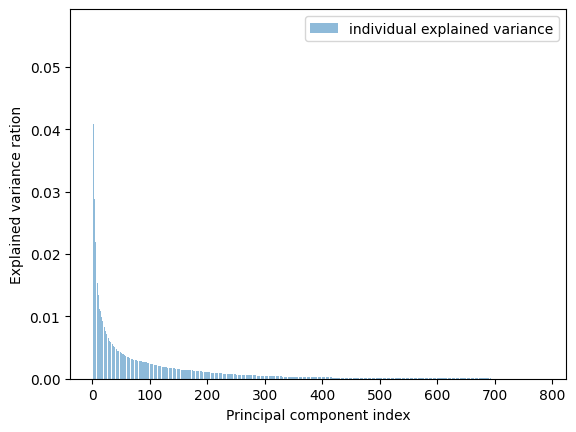

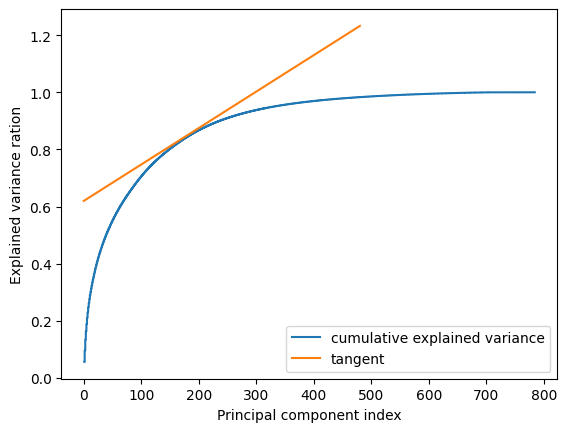

In [15]:
tot = sum(eigen_vals)

twenty = 0
index = 0
while index < 500:
    print(index, eigen_vals[index])
    twenty = twenty + eigen_vals[index]
    index += 1

print(twenty)
print(twenty/tot)
print(tot)

var_exp = [(i / tot) for i in 
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,785), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.savefig('foo.png')
plt.show()

import matplotlib.pyplot as plt2
plt2.step(range(1,785), cum_var_exp, where='mid', label = 'cumulative explained variance')
x = [0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 480]
verschiebung = 0.62
steigung = (1/784)
y = [verschiebung, verschiebung + 40 * steigung, verschiebung + 80 * steigung, verschiebung + 120 * steigung, verschiebung + 160 * steigung, verschiebung + 200 * steigung, verschiebung + 240 * steigung, verschiebung + 280 * steigung, verschiebung + 320 * steigung, verschiebung + 360 * steigung, verschiebung + 400 * steigung, verschiebung + 480 * steigung]
plt2.plot(x,y)
plt2.ylabel('Explained variance ration')
plt2.xlabel('Principal component index')
plt2.legend(loc='best', labels = ["cumulative explained variance", "tangent"])
plt2.savefig('explained variance vs principle components.png')
plt2.show()


Sort the (eigenvalue, eigenvector) tuples from high to low

In [16]:
# Make a List of (eigenvalue, eigenvector) tuples
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
                for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Plot values of the two eigenvectors

Array Dimensionality: (784, 2)


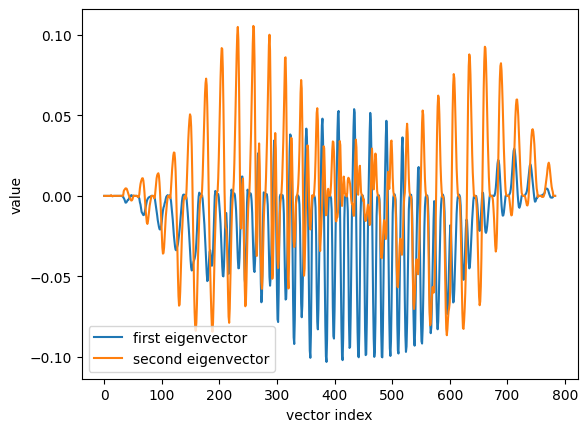

In [17]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
                eigen_pairs[1][1][:, np.newaxis]))

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print('Array Dimensionality:', w.shape)

plt.plot(w)
plt.legend(['first eigenvector', 'second eigenvector'])
plt.xlabel('vector index')
plt.ylabel('value')
plt.show()

Multiply the standardized train data with matrix W and save the data in a dataframe

In [18]:
import pandas as pd

x_train_pca = x_train_std.dot(w)

print(x_train_pca)

pca_df = pd.DataFrame(data=x_train_pca, columns=("1st_principal", "2nd_principal"))

[[0.922 -4.815]
 [-8.709 -7.754]
 [-2.328 9.431]
 ...
 [3.777 -3.231]
 [-1.722 -4.948]
 [1.427 -6.175]]


Plot the resulting dataset

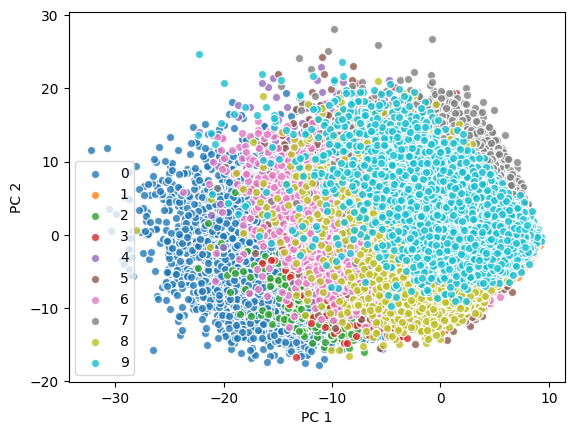

In [19]:
import matplotlib.pyplot as plt

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#markers = ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers) :
  plt.scatter(x_train_pca[y_train==l, 0], x_train_pca[y_train==l, 1], c=c, label=l, marker=m, alpha=0.8 , edgecolors='white')
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc='lower left')
  plt.savefig('test.png')